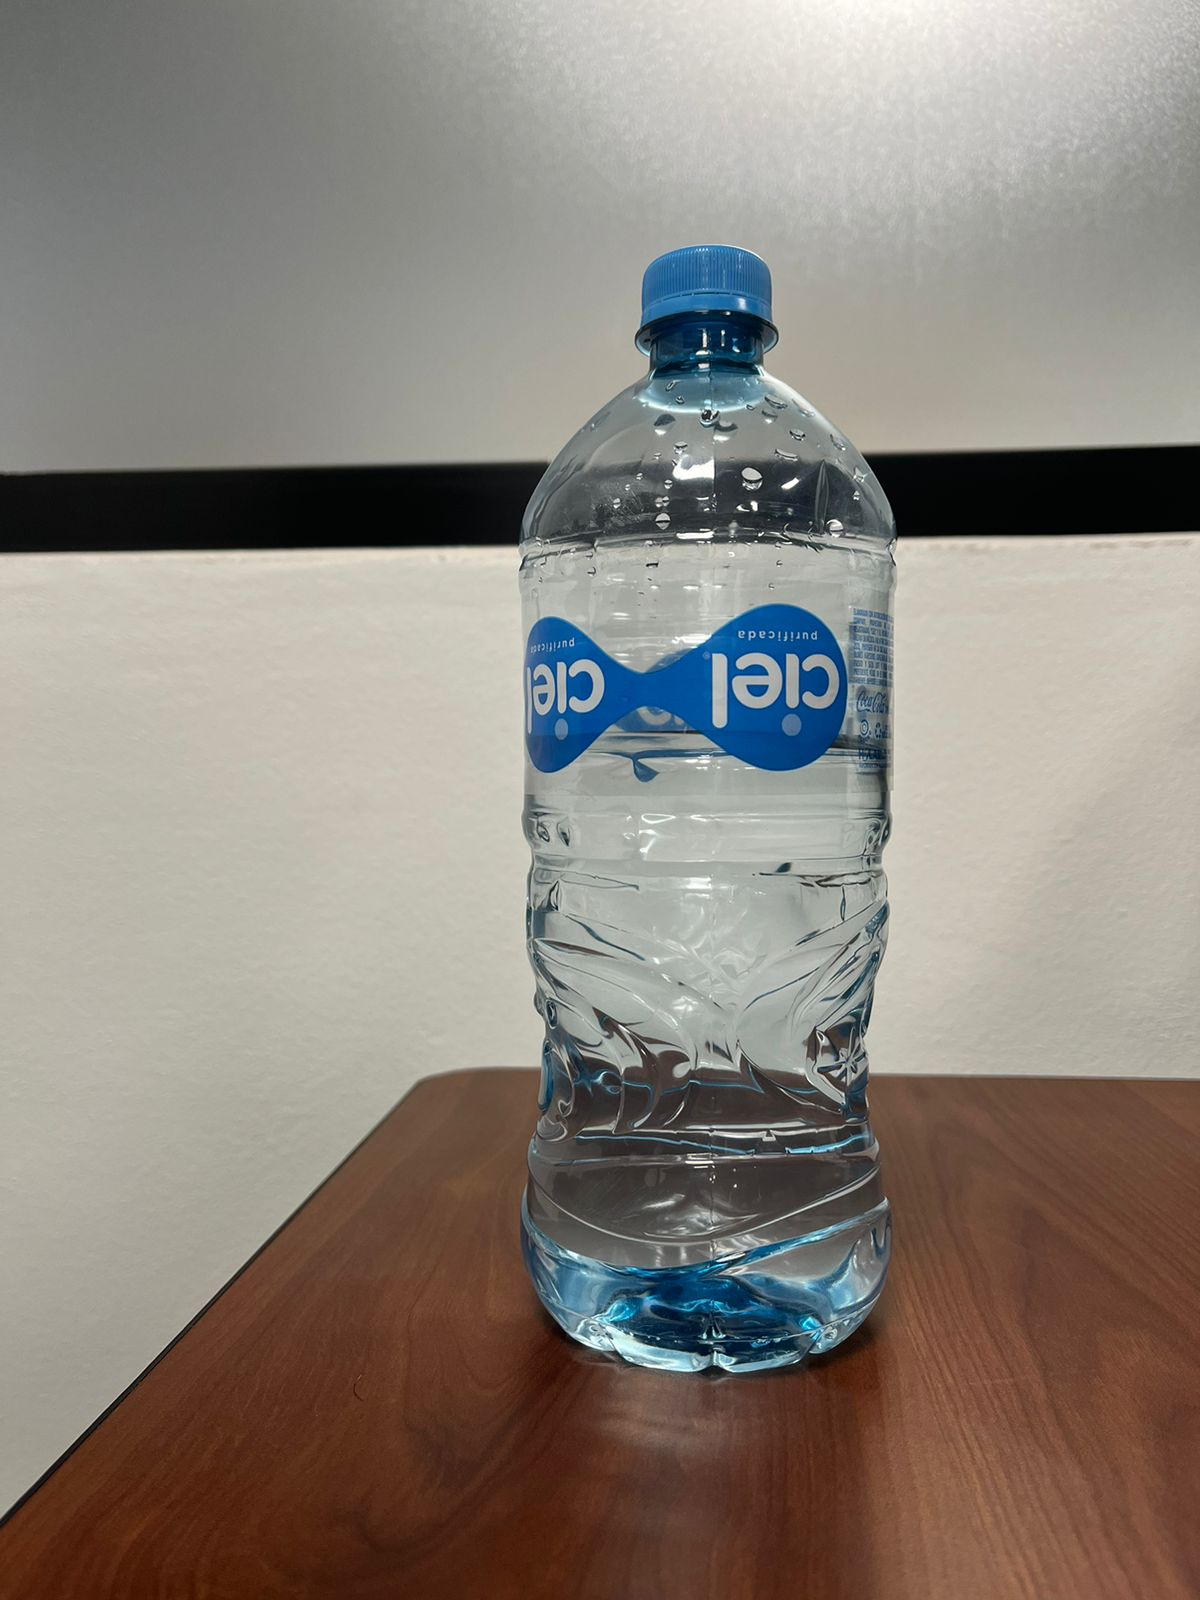

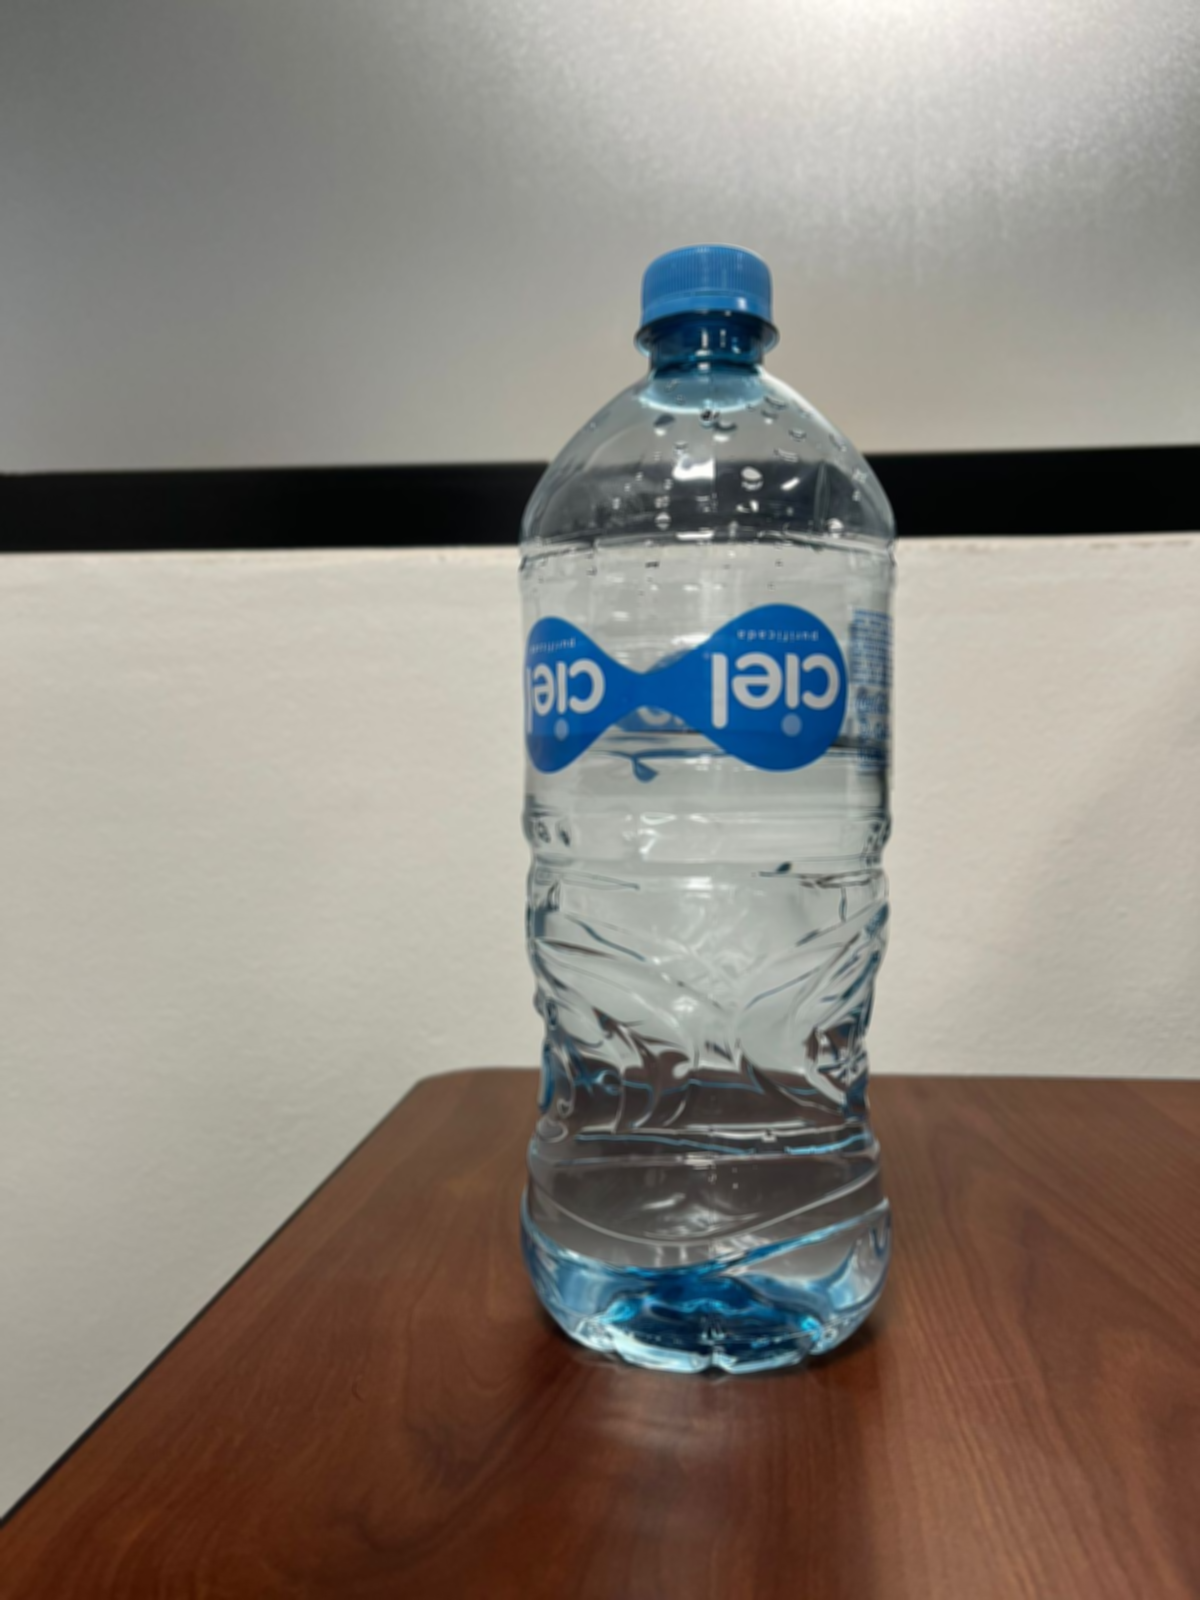

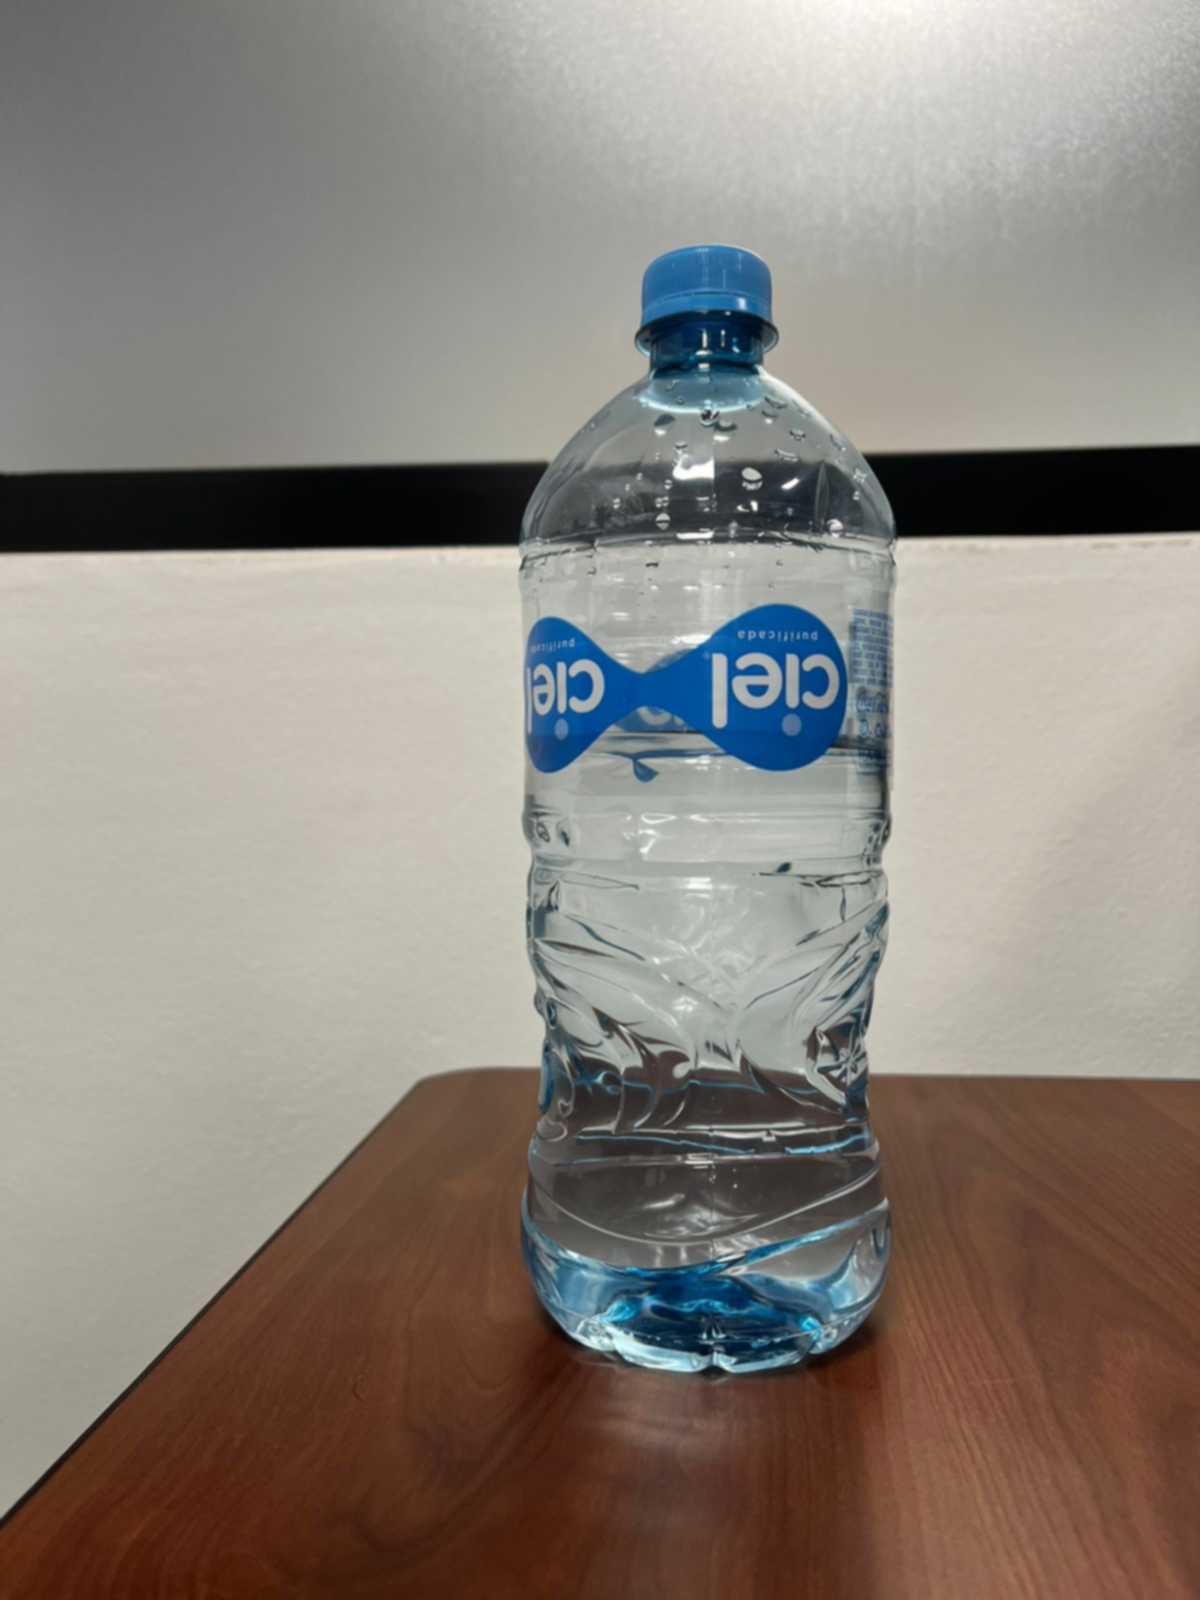

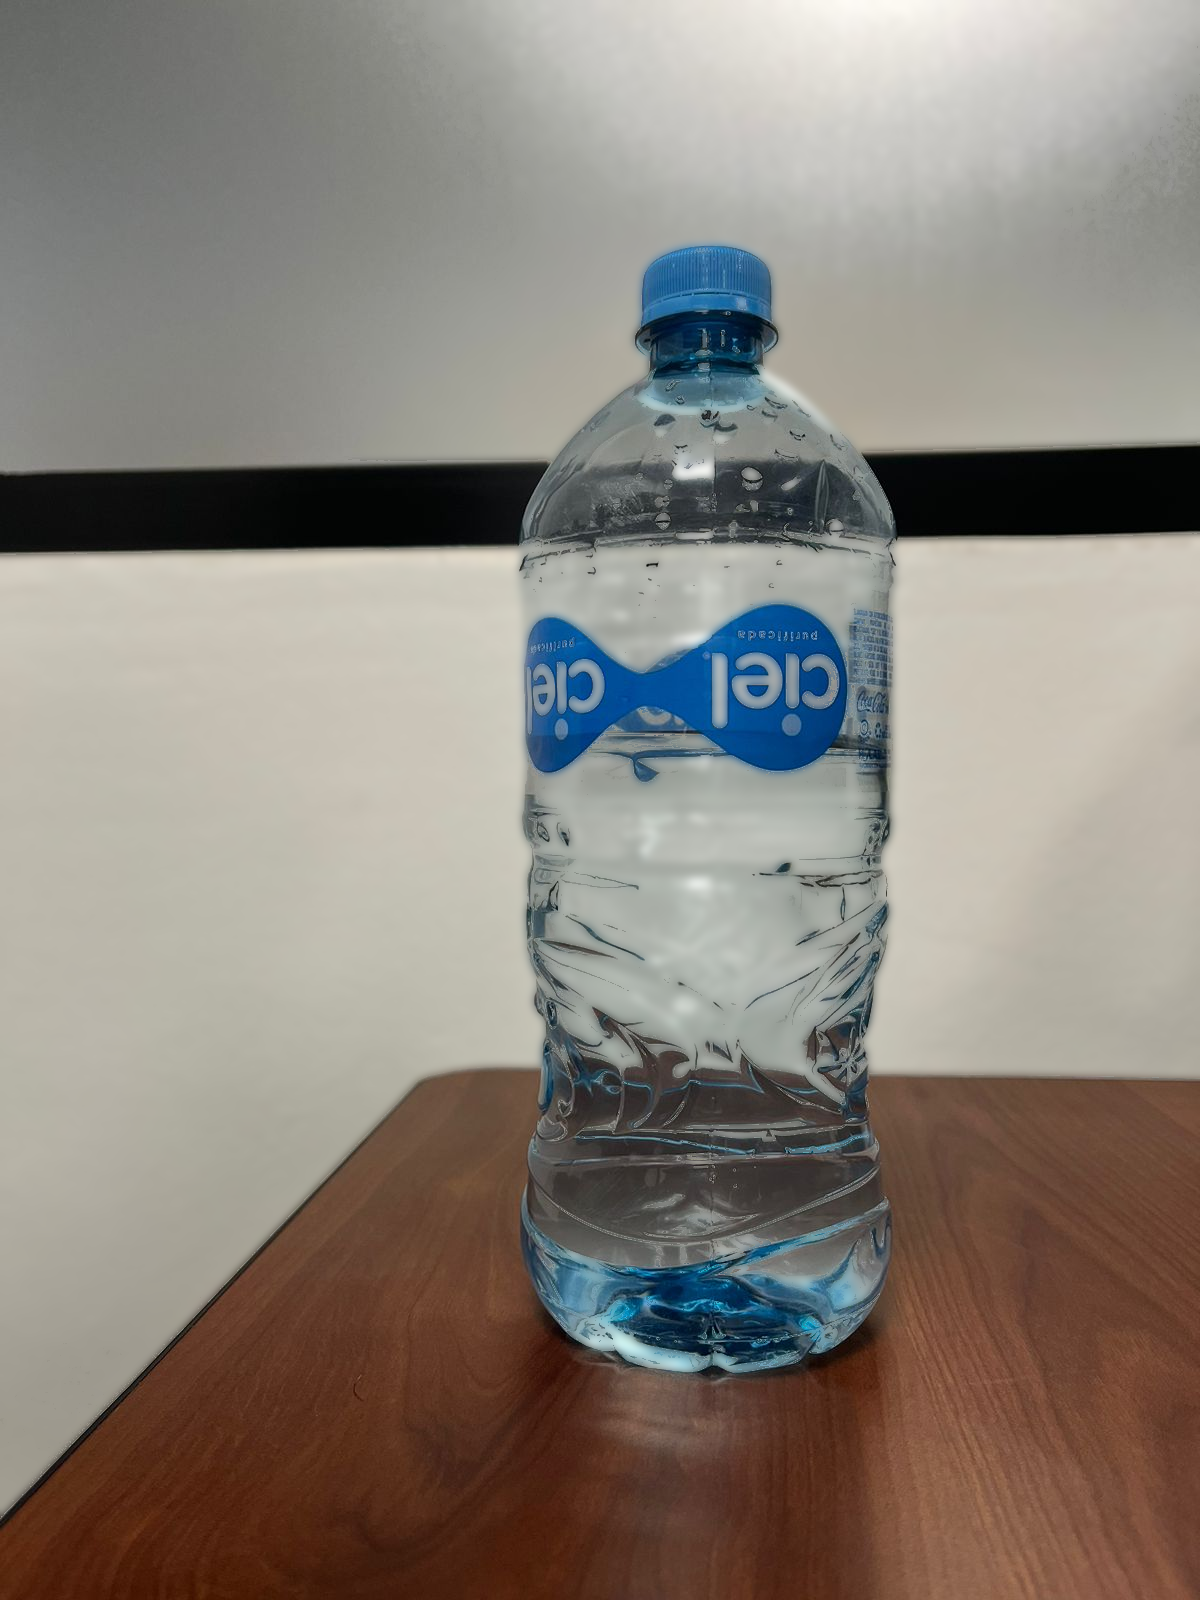

In [54]:
#Práctica Suavizado
#Enrique Ramírez Pérez
#Homero Meneses Vazquez

# UPIIT

import cv2
from google.colab.patches import cv2_imshow
import numpy as np

img = cv2.imread('imagen.jpeg')

# Media y Gaussiano de 5x5
kernel_media = np.ones((5,5), np.float32) / 25
kernel_gauss = cv2.getGaussianKernel(5, 0)

# Algoritmo de convolución discreta
img_media = cv2.filter2D(img, -1, kernel_media)
img_gauss = cv2.filter2D(img, -1, kernel_gauss*kernel_gauss.T)

cv2_imshow(img)
cv2_imshow(img_media)
cv2_imshow(img_gauss)

# Crea una máscara de enmascaramiento para destacar el objeto de interés
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, threshold = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)
mask = cv2.merge((threshold, threshold, threshold))

# Suavizar el fondo
background = cv2.GaussianBlur(img, (25, 25), 0)

# Combinar la imagen original con el fondo suavizado 
result = np.where(mask != (0, 0, 0), img, background)

cv2_imshow(result)